In [ ]:
Problem: WHICH CUSTOMERS WILL STOP BUYING OUR PRODUCT

In [ ]:
1.Load all libries and loading data

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import lightgbm as lgb
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
2.Understaning the data

In [3]:
# Read the CSV file
train = pd.read_csv('Train (1).csv')
test = pd.read_csv('Test (1).csv')

In [4]:
train.head()

,ID,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,Target
0,ID_YEB05X4KUGPQ,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
1,ID_Z9IQ9QH52KVN,Nebula,K > 24 month,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,NaN,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,31.0,0
2,ID_YZSU7B7M35QS,Celestial,K > 24 month,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,NaN,1.0,NaN,NaN,NO,61,NaN,NaN,0
3,ID_QS4F5LEX29KM,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
4,ID_8IYIC9PFU8U1,Eclipsara,K > 24 month,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,NaN,NaN,NO,62,Mixt 250F=Unlimited_call24H,31.0,0


In [5]:
test.head()

,ID,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,mrg,regularity,top_pack,freq_top_pack
0,ID_LZ8K373W7EWV,Droidika,K > 24 month,2008.55,16.0,2010.26,670.09,17.0,10.0,247.0,17.0,70.0,NaN,NaN,NO,59,On net 200F=Unlimited _call24H,11.0
1,ID_04KNWHGV5783,Luminous,K > 24 month,2991.45,14.0,2991.45,997.01,17.0,NaN,99.0,100.0,84.0,NaN,NaN,NO,49,All-net 500F=2000F;5d,12.0
2,ID_CXS07G6VLB2U,Astral,K > 24 month,1581.20,8.0,1578.21,526.07,8.0,436.0,47.0,113.0,5.0,NaN,NaN,NO,13,Jokko_Daily,6.0
3,ID_N3NFJJVHS25K,Eclipsara,K > 24 month,2564.10,12.0,2777.78,926.07,13.0,0.0,135.0,181.0,NaN,NaN,NaN,NO,53,All-net 500F=2000F;5d,13.0
4,ID_R36J4ROT93E9,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN


In [6]:
train.shape

(1507834, 19)

In [7]:
test.shape

(380127, 18)

In [8]:
train.describe()

,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target
count,978320.000000,978320.000000,999713.000000,999713.000000,999713.000000,7.660280e+05,957192.000000,881271.000000,604784.000000,118986.000000,95505.000000,1.507834e+06,876011.000000,1.507834e+06
mean,2361.212767,11.521423,2352.073152,784.027307,13.967657,3.354667e+03,278.000929,95.325088,23.146017,8.092187,7.465515,2.804414e+01,9.263913,1.873648e-01
std,3028.954909,13.266779,3053.176864,1017.723634,14.682316,1.330460e+04,874.412483,203.328016,63.506893,40.739423,32.145740,2.228078e+01,12.268658,3.902042e-01
min,4.270000,1.000000,0.430000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000e+00
25%,427.350000,2.000000,427.350000,142.310000,3.000000,0.000000e+00,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000e+00
50%,1282.050000,7.000000,1282.050000,427.350000,9.000000,2.560000e+02,27.000000,29.000000,6.000000,1.000000,2.000000,2.400000e+01,5.000000,0.000000e+00
75%,3141.030000,16.000000,3146.580000,1048.720000,20.000000,2.879000e+03,156.000000,99.000000,20.000000,3.000000,5.000000,5.100000e+01,12.000000,0.000000e+00
max,124145.300000,133.000000,113696.580000,37898.720000,91.000000,1.823866e+06,50809.000000,12040.000000,4174.000000,4792.000000,3143.000000,6.200000e+01,629.000000,1.000000e+00


In [9]:
test.describe()

,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack
count,247072.000000,247072.000000,252754.00000,252754.000000,252754.000000,193087.000000,241613.000000,222897.000000,153126.000000,29861.000000,24076.000000,380127.000000,221348.000000
mean,2361.094384,11.519853,2350.29115,783.433060,13.957963,3346.095454,278.806310,95.193008,23.052088,8.164663,7.655300,28.081699,9.261584
std,3041.162190,13.242743,3074.82589,1024.940158,14.652660,12002.653047,874.253933,203.950776,65.042688,48.857605,33.021478,22.289094,12.268907
min,10.680000,1.000000,0.43000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,427.350000,2.000000,427.35000,142.310000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000
50%,1282.050000,7.000000,1282.05000,427.350000,9.000000,259.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000
75%,3141.030000,16.000000,3141.45000,1047.010000,19.000000,2884.000000,157.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000
max,86111.110000,146.000000,85882.48000,28627.350000,91.000000,977796.000000,26786.000000,6345.000000,3708.000000,4215.000000,1649.000000,62.000000,390.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507834 entries, 0 to 1507833
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ID                1507834 non-null  object 
 1   region            913743 non-null   object 
 2   tenure            1507834 non-null  object 
 3   Amount            978320 non-null   float64
 4   refill_frequency  978320 non-null   float64
 5   revenue           999713 non-null   float64
 6   arpu_segment      999713 non-null   float64
 7   frequency         999713 non-null   float64
 8   data_volume       766028 non-null   float64
 9   on_net            957192 non-null   float64
 10  Procuct_1         881271 non-null   float64
 11  Procuct_2         604784 non-null   float64
 12  zone1             118986 non-null   float64
 13  zone2             95505 non-null    float64
 14  mrg               1507834 non-null  object 
 15  regularity        1507834 non-null  int64  
 16  

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                380127 non-null  object 
 1   region            230399 non-null  object 
 2   tenure            380127 non-null  object 
 3   Amount            247072 non-null  float64
 4   refill_frequency  247072 non-null  float64
 5   revenue           252754 non-null  float64
 6   arpu_segment      252754 non-null  float64
 7   frequency         252754 non-null  float64
 8   data_volume       193087 non-null  float64
 9   on_net            241613 non-null  float64
 10  Procuct_1         222897 non-null  float64
 11  Procuct_2         153126 non-null  float64
 12  zone1             29861 non-null   float64
 13  zone2             24076 non-null   float64
 14  mrg               380127 non-null  object 
 15  regularity        380127 non-null  int64  
 16  top_pack          22

In [12]:
# Count the occurrences of each unique value in the target variable
target_counts = train['Target'].value_counts()

# Print the counts
print(target_counts)

Target
0    1225319
1     282515
Name: count, dtype: int64


In [ ]:
Assume missing data = customers didnt do anthing

In [ ]:
3.EDA

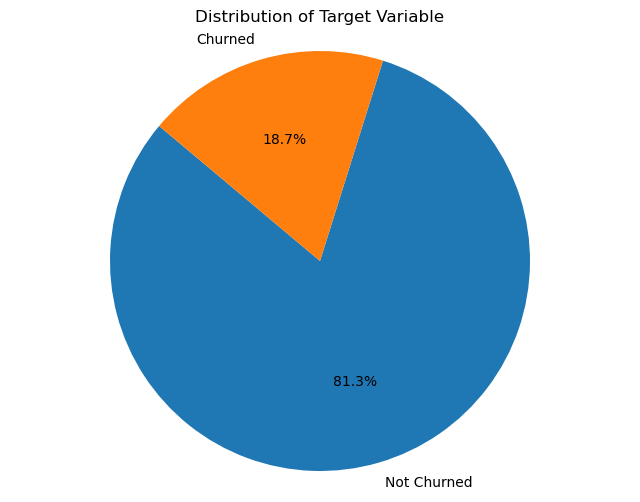

In [13]:
# Define labels
labels = ['Not Churned', 'Churned']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

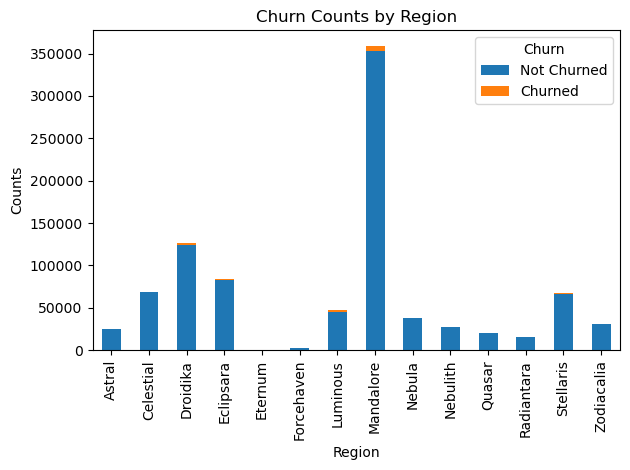

In [14]:
# Group by region and churn status and count occurrences
churn_counts = train.groupby(['region', 'Target']).size().unstack(fill_value=0)

# Plotting
churn_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Counts')
plt.title('Churn Counts by Region')

# Show legend
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Show plot
plt.tight_layout()
plt.show()

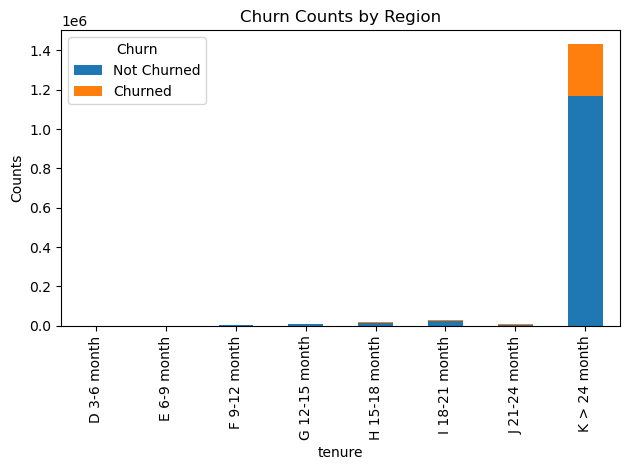

In [15]:
# Group by region and churn status and count occurrences
churn_counts = train.groupby(['tenure', 'Target']).size().unstack(fill_value=0)

# Plotting
churn_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

# Add labels and title
plt.xlabel('tenure')
plt.ylabel('Counts')
plt.title('Churn Counts by Region')

# Show legend
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Show plot
plt.tight_layout()
plt.show()

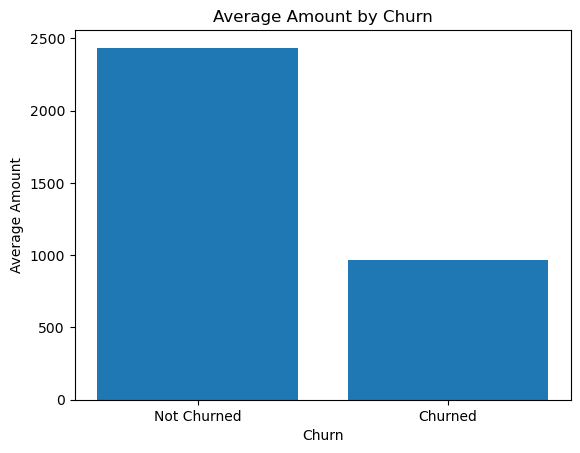

In [16]:
# Group by churn and calculate mean revenue for each group
churn_amount = train.groupby('Target')['Amount'].mean()

# Plotting the bar chart
plt.bar(churn_amount.index, churn_amount.values)
plt.xlabel('Churn')
plt.ylabel('Average Amount')
plt.xticks(churn_amount.index, ['Not Churned', 'Churned'])
plt.title('Average Amount by Churn')
plt.show()

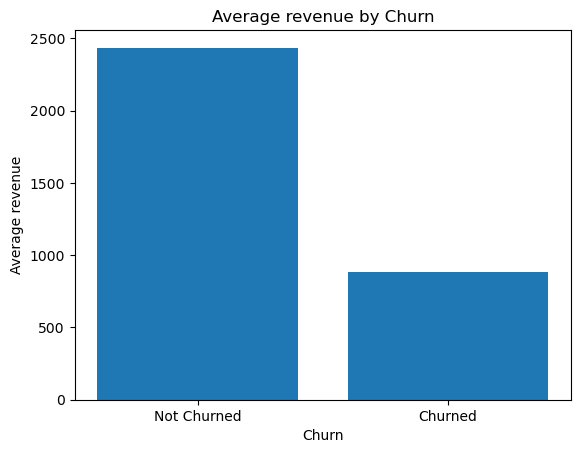

In [17]:
# Group by churn and calculate mean revenue for each group
churn_revenue = train.groupby('Target')['revenue'].mean()

# Plotting the bar chart
plt.bar(churn_revenue.index, churn_revenue.values)
plt.xlabel('Churn')
plt.ylabel('Average revenue')
plt.xticks(churn_revenue.index, ['Not Churned', 'Churned'])
plt.title('Average revenue by Churn')
plt.show()

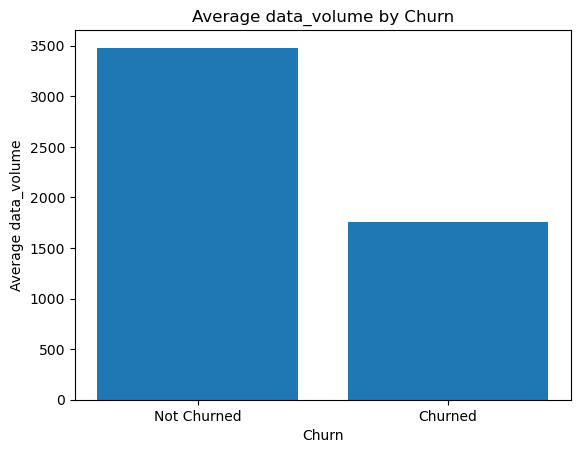

In [18]:
# Group by churn and calculate mean revenue for each group
churn_data_volume = train.groupby('Target')['data_volume'].mean()

# Plotting the bar chart
plt.bar(churn_data_volume.index, churn_data_volume.values)
plt.xlabel('Churn')
plt.ylabel('Average data_volume')
plt.xticks(churn_data_volume.index, ['Not Churned', 'Churned'])
plt.title('Average data_volume by Churn')
plt.show()

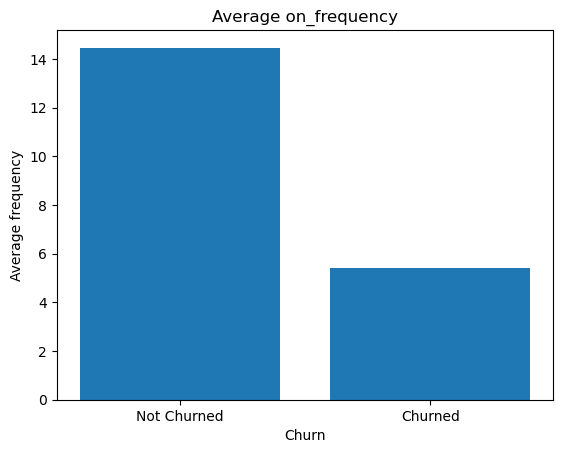

In [19]:
# Group by churn and calculate mean revenue for each group
churn_frequency = train.groupby('Target')['frequency'].mean()

# Plotting the bar chart
plt.bar(churn_frequency.index, churn_frequency.values)
plt.xlabel('Churn')
plt.ylabel('Average frequency')
plt.xticks(churn_frequency.index, ['Not Churned', 'Churned'])
plt.title('Average on_frequency')
plt.show()

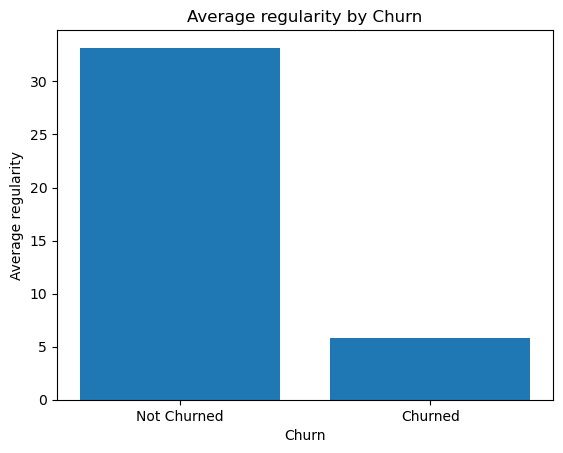

In [20]:
# Group by churn and calculate mean revenue for each group
churn_regularity = train.groupby('Target')['regularity'].mean()

# Plotting the bar chart
plt.bar(churn_regularity.index, churn_regularity.values)
plt.xlabel('Churn')
plt.ylabel('Average regularity')
plt.xticks(churn_regularity.index, ['Not Churned', 'Churned'])
plt.title('Average regularity by Churn')
plt.show()

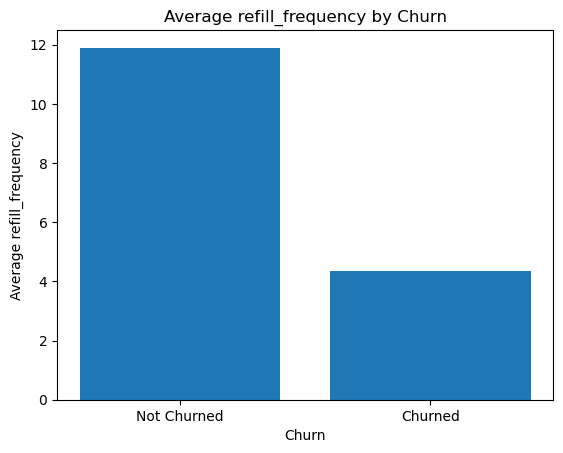

In [21]:
# Group by churn and calculate mean revenue for each group
churn_refill_frequency  = train.groupby('Target')['refill_frequency'].mean()

# Plotting the bar chart
plt.bar(churn_refill_frequency.index, churn_refill_frequency.values)
plt.xlabel('Churn')
plt.ylabel('Average refill_frequency')
plt.xticks(churn_refill_frequency.index, ['Not Churned', 'Churned'])
plt.title('Average refill_frequency by Churn')
plt.show()

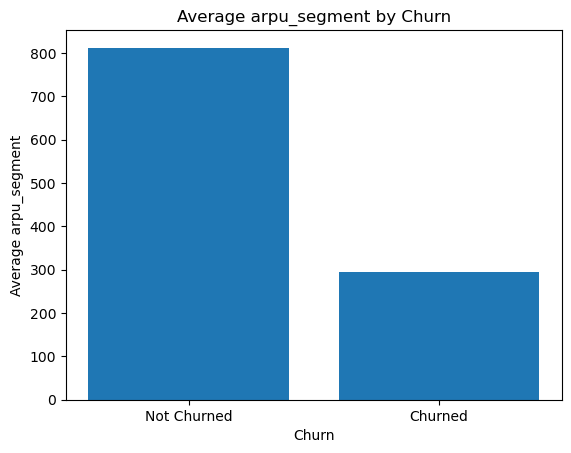

In [22]:
# Group by churn and calculate mean revenue for each group
churn_arpu_segment  = train.groupby('Target')['arpu_segment'].mean()

# Plotting the bar chart
plt.bar(churn_arpu_segment.index, churn_arpu_segment.values)
plt.xlabel('Churn')
plt.ylabel('Average arpu_segment')
plt.xticks(churn_arpu_segment.index, ['Not Churned', 'Churned'])
plt.title('Average arpu_segment by Churn')
plt.show()

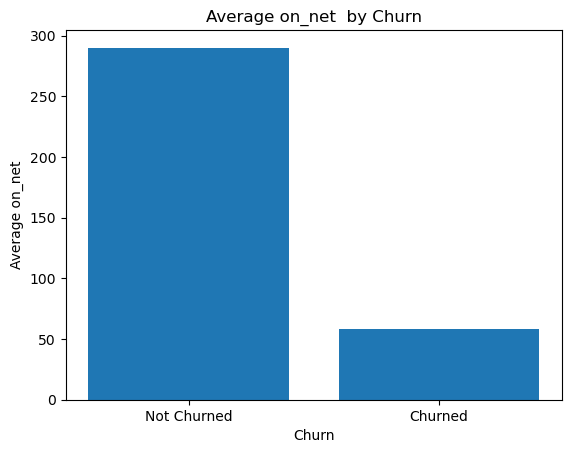

In [23]:
# Group by churn and calculate mean revenue for each group
churn_on_net = train.groupby('Target')['on_net'].mean()

# Plotting the bar chart
plt.bar(churn_on_net.index, churn_on_net.values)
plt.xlabel('Churn')
plt.ylabel('Average on_net')
plt.xticks(churn_on_net.index, ['Not Churned', 'Churned'])
plt.title('Average on_net  by Churn')
plt.show()

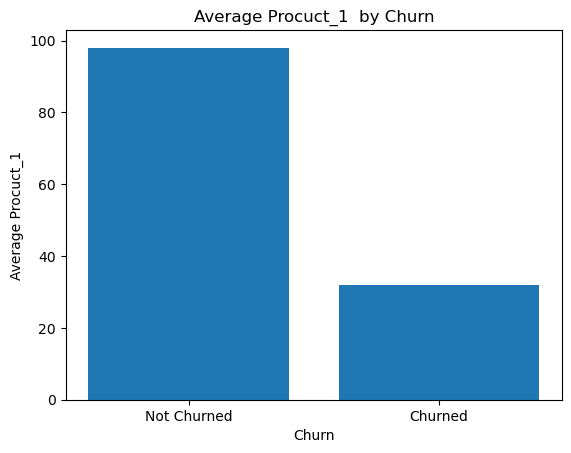

In [24]:
# Group by churn and calculate mean revenue for each group
churn_Procuct_1 = train.groupby('Target')['Procuct_1'].mean()

# Plotting the bar chart
plt.bar(churn_Procuct_1.index, churn_Procuct_1.values)
plt.xlabel('Churn')
plt.ylabel('Average Procuct_1')
plt.xticks(churn_Procuct_1.index, ['Not Churned', 'Churned'])
plt.title('Average Procuct_1  by Churn')
plt.show()

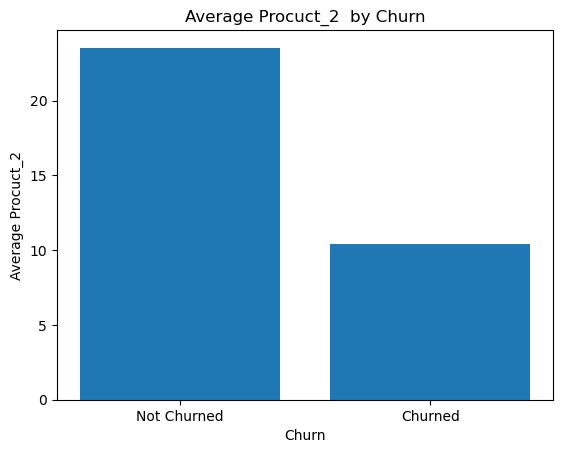

In [25]:
# Group by churn and calculate mean revenue for each group
churn_Procuct_2 = train.groupby('Target')['Procuct_2'].mean()

# Plotting the bar chart
plt.bar(churn_Procuct_2.index, churn_Procuct_2.values)
plt.xlabel('Churn')
plt.ylabel('Average Procuct_2')
plt.xticks(churn_Procuct_2.index, ['Not Churned', 'Churned'])
plt.title('Average Procuct_2  by Churn')
plt.show()

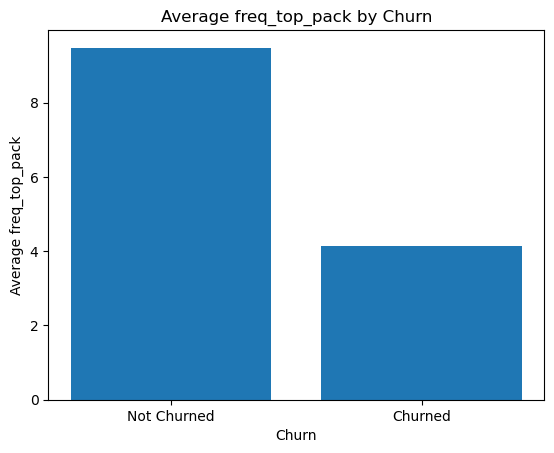

In [26]:
# Group by churn and calculate mean revenue for each group
churn_freq_top_pack = train.groupby('Target')['freq_top_pack'].mean()

# Plotting the bar chart
plt.bar(churn_Procuct_2.index, churn_freq_top_pack.values)
plt.xlabel('Churn')
plt.ylabel('Average freq_top_pack')
plt.xticks(churn_freq_top_pack.index, ['Not Churned', 'Churned'])
plt.title('Average freq_top_pack by Churn')
plt.show()

In [27]:
3.Data missing 

SyntaxError: invalid decimal literal (3725156156.py, line 1)

In [28]:
#missing values
missing_percentage_train = train.isnull().mean() *100
print(missing_percentage_train)

ID                   0.000000
region              39.400292
tenure               0.000000
Amount              35.117526
refill_frequency    35.117526
revenue             33.698736
arpu_segment        33.698736
frequency           33.698736
data_volume         49.196795
on_net              36.518741
Procuct_1           41.553845
Procuct_2           59.890545
zone1               92.108813
zone2               93.666080
mrg                  0.000000
regularity           0.000000
top_pack            41.902690
freq_top_pack       41.902690
Target               0.000000
dtype: float64


In [ ]:
Observations:
    -ID, tenure, mrg and regularity has no missing values
    -drop mrg has it has only 1 value
    -drop zone1 and zone2 as the column is close to 92% empty, it doesnt make sense to impute with mean

In [29]:
#missing values
missing_percentage_test = test.isnull().mean() *100
print(missing_percentage_test)

ID                   0.000000
region              39.388941
tenure               0.000000
Amount              35.002775
refill_frequency    35.002775
revenue             33.508012
arpu_segment        33.508012
frequency           33.508012
data_volume         49.204608
on_net              36.438874
Procuct_1           41.362492
Procuct_2           59.717147
zone1               92.144468
zone2               93.666327
mrg                  0.000000
regularity           0.000000
top_pack            41.769987
freq_top_pack       41.769987
dtype: float64


In [ ]:
4. Data Cleaning

In [30]:
# Drop features zone1 and zone2
train = train.drop(columns=["zone1", "zone2", "mrg"])

In [31]:
# Drop features zone1 and zone2

test= test.drop(columns=["zone1", "zone2", "mrg"])

In [32]:
#Handling missing value in categorical variable i.e. 'Region' and 'top_pack'

categorical_columns = ['region', 'top_pack']

for col in categorical_columns:
    train[col].fillna('missing', inplace=True)
    
for col in categorical_columns:
    test[col].fillna('missing', inplace=True)
    

In [33]:
#Handling missing values in Numeric variables

numeric_columns = ['Amount', 'refill_frequency', 'revenue', 'arpu_segment', 'frequency', 'data_volume', 'on_net', 'Procuct_1', 'Procuct_2', 'freq_top_pack']

# Replace missing values in numeric columns with -99
for col in numeric_columns:
    train[col].fillna(-99, inplace=True)
    
# Replace missing values in numeric columns with -99
for col in numeric_columns:
    test[col].fillna(-99, inplace=True)


In [34]:
train.isnull().sum()

ID                  0
region              0
tenure              0
Amount              0
refill_frequency    0
revenue             0
arpu_segment        0
frequency           0
data_volume         0
on_net              0
Procuct_1           0
Procuct_2           0
regularity          0
top_pack            0
freq_top_pack       0
Target              0
dtype: int64

In [ ]:
5.Feature Engineering

In [35]:
#Label encoding on feature with many categories like ‘Top_pack’

label_encoder = LabelEncoder()
train['top_pack'] = label_encoder.fit_transform(train['top_pack'])

test['top_pack'] = label_encoder.fit_transform(test['top_pack'])


In [36]:
#Dummy variables on feature with few categories like  ‘Region’

# Convert 'Region' into dummy variables
train = pd.get_dummies(train, columns=['region', 'tenure'], drop_first=True)
test = pd.get_dummies(test, columns=['region', 'tenure'], drop_first=True)

In [ ]:
7.Data Scaling

In [37]:
#Remove ID and target and create x variable and y variable
X = train.drop(columns=["ID", "Target"])
y =train["Target"]

test_final = test.drop(columns=["ID"])

In [ ]:
8.Dataset Imbalance

In [38]:
#Address imbalance dataset by SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [39]:
# Check class distribution after SMOTE

from collections import Counter
print("After SMOTE:", Counter(y_resampled))

After SMOTE: Counter({0: 1225319, 1: 1225319})


In [40]:
# Initialize RobustScaler
scaler = RobustScaler()


# Fit scaler to the data and transform it
train_scaled = scaler.fit_transform(X_resampled)

# Fit scaler to the data and transform it
test_final_scaled = scaler.transform(test_final)


In [41]:
# Split the data into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(train_scaled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
1.Classifer Model Selection

In [42]:
import time
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [43]:
classifiers = [
    ('LGBM', LGBMClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=False)),
    ('XGBoost', XGBClassifier(random_state=42))
]


In [44]:
f1_scores = []
runtimes = []

for name, clf in classifiers:
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes.append(runtime)
    
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

[LightGBM] [Info] Number of positive: 980648, number of negative: 979862
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.167317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2699
[LightGBM] [Info] Number of data points in the train set: 1960510, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500200 -> initscore=0.000802
[LightGBM] [Info] Start training from score 0.000802


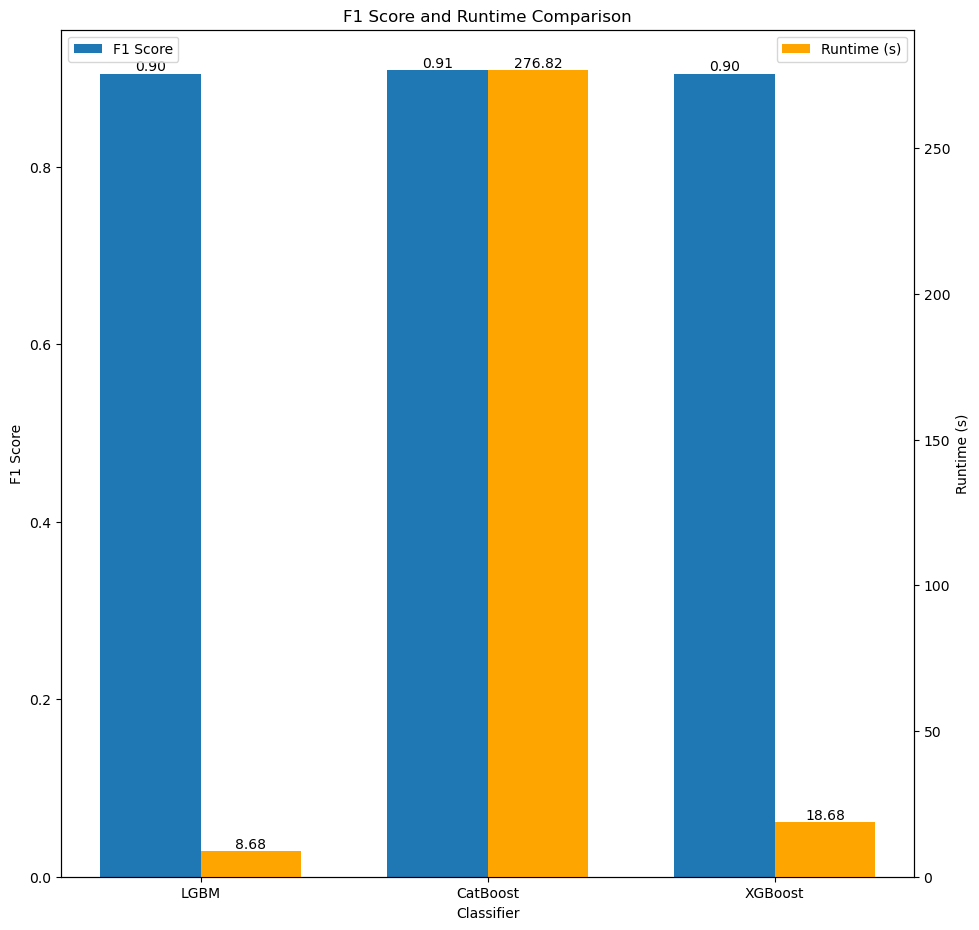

In [68]:
# Plotting
fig, ax = plt.subplots(figsize=(11, 11))

x = np.arange(len(classifiers))
width = 0.35

bars = ax.bar(x - width/2, f1_scores, width, label='F1 Score')
ax2 = ax.twinx()
bars2 = ax2.bar(x + width/2, runtimes, width, color='orange', label='Runtime (s)')

ax.set_xlabel('Classifier')
ax.set_ylabel('F1 Score')
ax2.set_ylabel('Runtime (s)')
ax.set_title('F1 Score and Runtime Comparison')
ax.set_xticks(x)
ax.set_xticklabels([name for name, _ in classifiers])
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adding numeric labels to each bar
for bar, f1 in zip(bars, f1_scores):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{f1:.2f}', ha='center', va='bottom')

for bar, runtime in zip(bars2, runtimes):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{runtime:.2f}', ha='center', va='bottom', color='black')

plt.show()

In [ ]:
10.Model Building and Evaluation

In [45]:
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier


In [46]:
# Initialize classifiers
lgbm_clf = LGBMClassifier(random_state=42)
catboost_clf = CatBoostClassifier(random_state=42, verbose=False)
xgboost_clf = XGBClassifier(random_state=42)

In [47]:

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lgbm', lgbm_clf),
    ('catboost', catboost_clf),
    ('xgboost', xgboost_clf)
], voting='soft')  # Use soft voting

In [48]:
# Train the voting classifier
voting_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 980648, number of negative: 979862
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.168606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2699
[LightGBM] [Info] Number of data points in the train set: 1960510, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500200 -> initscore=0.000802
[LightGBM] [Info] Start training from score 0.000802


VotingClassifier(estimators=[('lgbm', LGBMClassifier(random_state=42)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x00000242FC17DF10>),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_m...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [49]:
# Make predictions
y_pred = voting_clf.predict(X_test)

In [50]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1:", f1)

Accuracy: 0.903745552182287
Precision: 0.8674990695943431
Recall: 0.952695660703557
f1: 0.9081034963018947


In [ ]:
Create a auc/roc curve

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

In [53]:
# Plot ROC curve
#plt.figure(figsize=(8, 6))
#plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
#plt.legend(loc='lower right')
#plt.show()

In [ ]:
Final Prediction

In [54]:
y_pred_final = voting_clf.predict(test_final_scaled)
y_pred_final

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [55]:
# Convert array to DataFrame
predictions = pd.DataFrame(y_pred_final, columns=['Target'])

# Print the DataFrame
predictions.head()

,Target
0,0
1,0
2,0
3,0
4,1


In [57]:
# Read the CSV file
ss = pd.read_csv('SampleSubmission (1).csv')

In [58]:
# Make predictions in test set and prepare submission file
predictions =  pd.DataFrame(y_pred_final, columns=['Predictions'])
sub_file = ss.copy()
sub_file.Target = predictions
sub_file.to_csv('voting_clf_2.csv', index = False)